LABORATORIO 01

Para predecir el precio de la miel. El archivo /content/gdrive/MyDrive/420/dataset lab01/honey_purity_dataset20K.csv contiene un conjunto de datos en el que contiene las siguientes columnas.


*   Puntuación de color
*   Densidad
*   Contenido de agua
*   Nivel de pH
*   Conductividad electrica
*   Nivel de fructosa
*   Nivel de glucosa
*   Viscosidad
*   Puereza

















In [2]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


REGRESION LINEAL MULTIPLE

In [4]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/420/dataset lab01/honey_purity_dataset20K.csv', delimiter=',')

# Separar características (X) y variable objetivo (y)
X = data[:, :9]
y = data[:, 9]  # Suponiendo que la columna 9 contiene el precio

# Obtener la cantidad de filas (tamaño de muestra)
m = y.size
print(m)

# Imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:,1]', 'X[:,2]', 'X[:,3]', 'X[:,4]', 'X[:,5]', 'X[:,6]', 'X[:,7]', 'X[:,8]', 'y'))
print('-' * 88)
for i in range(10):
    print('{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:10.2f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], y[i]))


20000
  X[:,0]  X[:,1]  X[:,2]  X[:,3]  X[:,4]  X[:,5]  X[:,6]  X[:,7]  X[:,8]         y
----------------------------------------------------------------------------------------
    2.81    1.75   23.04    6.29    0.76   39.02   33.63 4844.50    0.68    645.24
    9.47    1.82   17.50    7.20    0.71   38.15   34.41 6689.02    0.89    385.85
    4.61    1.84   23.72    7.31    0.80   27.47   34.36 6883.60    0.66    639.64
    1.77    1.40   16.61    4.01    0.78   31.52   28.15 7167.56    1.00    946.46
    6.11    1.25   19.63    4.82    0.90   29.65   42.52 5125.44    1.00    432.62
    2.17    1.35   20.67    4.11    0.75   27.19   43.54 3967.30    0.80    593.55
    7.15    1.57   13.37    5.79    0.89   43.38   44.94 7384.93    0.95    838.98
    3.17    1.23   23.35    6.64    0.85   43.50   36.33 5598.87    0.66    639.64
    4.98    1.73   16.60    6.61    0.74   22.49   44.74 8800.10    0.95    238.05
    8.49    1.50   15.75    4.50    0.86   49.59   38.13 2675.60    0.82   

In [5]:
def featureNormalize(X):
    # Copia la matriz de características para no modificar la original
    X_norm = X.copy()

    # Inicializa vectores para almacenar medias y desviaciones estándar de las características
    mu = np.zeros(X.shape[1])  # Vector de medias
    sigma = np.zeros(X.shape[1])  # Vector de desviaciones estándar

    # Calcula las medias de las características
    mu = np.mean(X, axis=0)

    # Calcula las desviaciones estándar de las características
    sigma = np.std(X, axis=0)

    # Normaliza las características restando la media y dividiendo por la desviación estándar
    X_norm = (X - mu) / sigma

    # Devuelve la matriz de características normalizadas, el vector de medias y el vector de desviaciones estándar
    return X_norm, mu, sigma


In [6]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.81000e+00 1.75000e+00 2.30400e+01 ... 3.36300e+01 4.84450e+03
  6.80000e-01]
 [9.47000e+00 1.82000e+00 1.75000e+01 ... 3.44100e+01 6.68902e+03
  8.90000e-01]
 [4.61000e+00 1.84000e+00 2.37200e+01 ... 3.43600e+01 6.88360e+03
  6.60000e-01]
 ...
 [4.67000e+00 1.85000e+00 2.24200e+01 ... 3.19800e+01 9.55241e+03
  8.00000e-01]
 [2.26000e+00 1.79000e+00 1.79300e+01 ... 3.77700e+01 2.82810e+03
  8.90000e-01]
 [8.09000e+00 1.68000e+00 2.45000e+01 ... 3.77100e+01 6.10303e+03
  8.40000e-01]]
Media calculada: [5.50720900e+00 1.53575950e+00 1.84998380e+01 4.99510750e+00
 7.99518000e-01 3.50175995e+01 3.25613445e+01 5.75894160e+03
 8.25600000e-01]
Desviación estandar calculada: [2.58739647e+00 1.87458911e-01 3.75026052e+00 1.44733627e+00
 5.78455502e-02 8.64779028e+00 7.19744869e+00 2.45625629e+03
 1.39528062e-01]
[[-1.04244132  1.14286645  1.21062576 ...  0.14847699 -0.37229079
  -1.04351769]
 [ 1.53157471  1.51628162 -0.26660495 ...  0.25684872  0.3786569
   0.4615559 ]
 [-0.34676131  1.6229

In [7]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

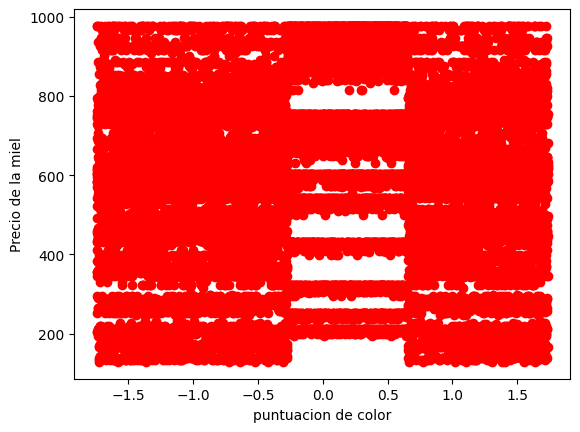

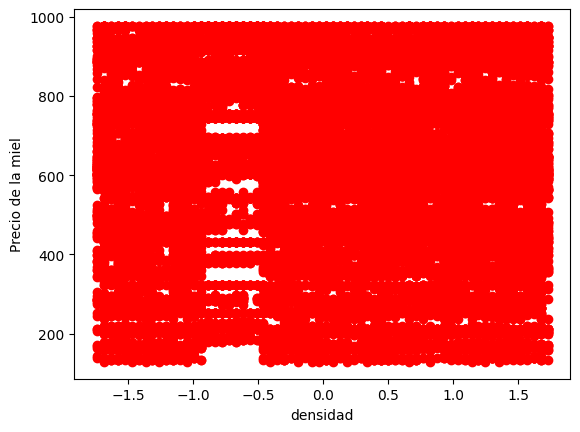

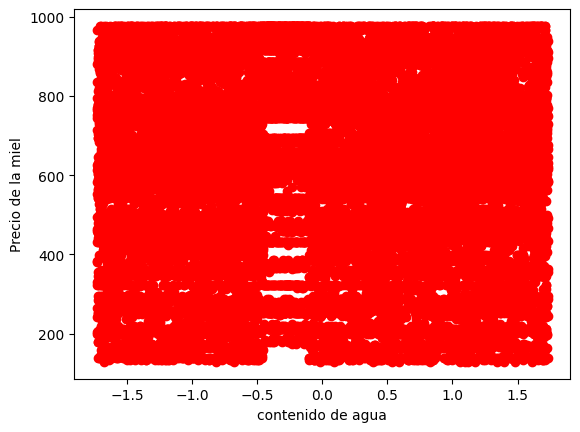

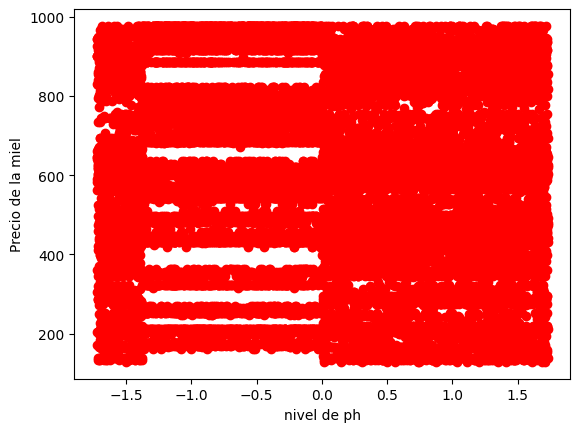

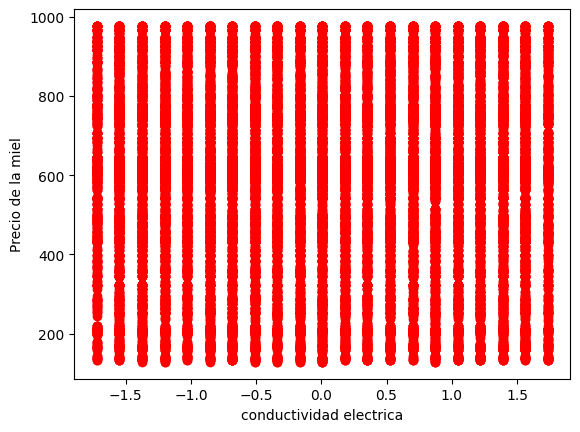

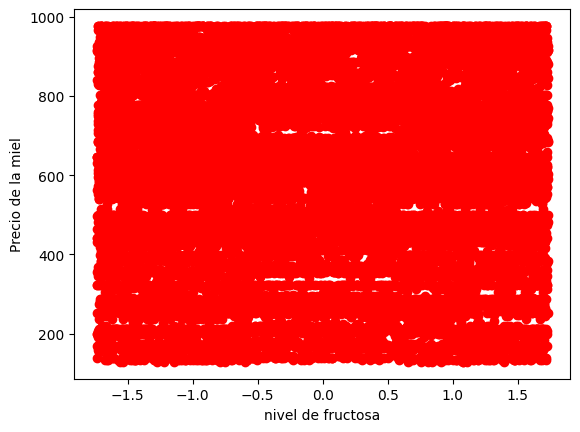

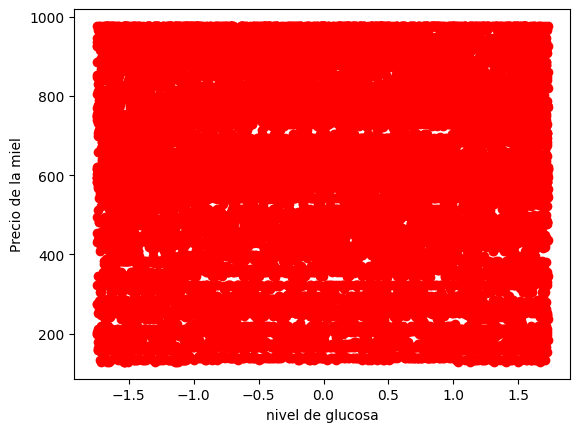

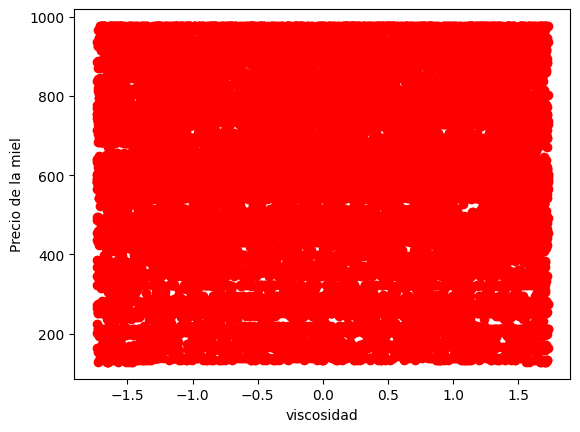

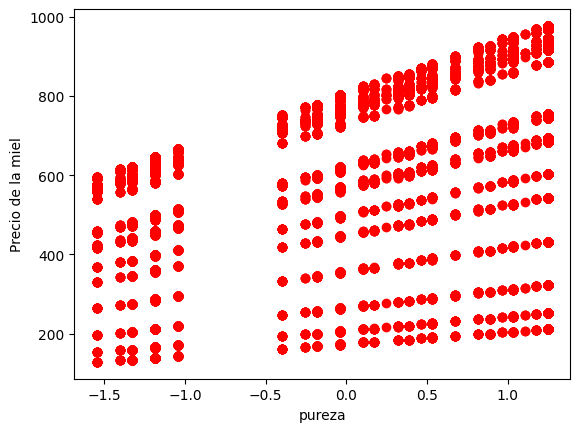

In [8]:
xlabel1 = "puntuacion de color"
xlabel2 = "densidad"
xlabel3 = "contenido de agua"
xlabel4 = "nivel de ph"
xlabel5 = "conductividad electrica"
xlabel6 = "nivel de fructosa"
xlabel7 = "nivel de glucosa"
xlabel8 = "viscosidad"
xlabel9 = "pureza"
ylabel1 = "Precio de la miel"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y, xlabel7, ylabel1)
graficarDatos(X_norm[:, 7], y, xlabel8, ylabel1)
graficarDatos(X_norm[:, 8], y, xlabel9, ylabel1)

In [9]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [10]:
print(X)

[[ 1.         -1.04244132  1.14286645 ...  0.14847699 -0.37229079
  -1.04351769]
 [ 1.          1.53157471  1.51628162 ...  0.25684872  0.3786569
   0.4615559 ]
 [ 1.         -0.34676131  1.62297166 ...  0.24990182  0.45787502
  -1.18685803]
 ...
 [ 1.         -0.32357198  1.67631669 ... -0.08077091  1.54441066
  -0.18347564]
 [ 1.         -1.25501021  1.35624655 ...  0.72368081 -1.1932149
   0.4615559 ]
 [ 1.          0.99822004  0.76945129 ...  0.71534452  0.14008652
   0.10320505]]


In [11]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [12]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 5.94965621e+02  7.80573877e-01 -8.22574313e-01  1.97690882e+00
  1.13061500e-02 -3.69333630e-01 -2.75383827e-01 -1.34987117e+00
 -2.12998318e+00  1.03088886e+02]


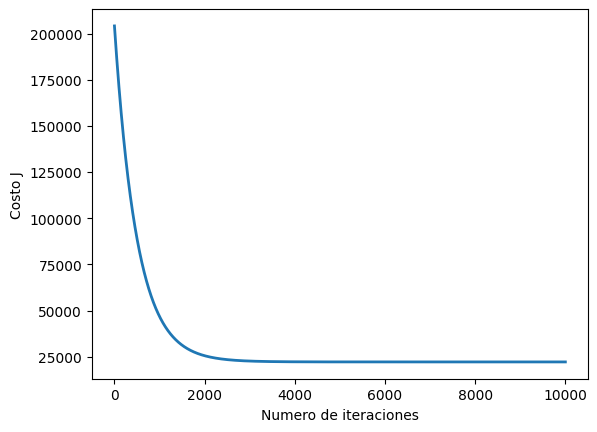

In [13]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [14]:
#prediccion1
X_array = [1,3.17, 1.60, 20.08, 7.00, 0.60, 30.78, 30.39, 4763.3, 0.70]

# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $504.71


In [16]:
#prediccion2
X_array = [1,1.49, 2.01, 20.04, 6.92, 2.67, 37.26, 27.43, 5699, 0.45]

# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $303.99


In [17]:
#prediccion3
X_array = [1,3.82, 1.71, 17.81, 5.13, 3.95, 40.89, 34.15, 7654, 0.80]

# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $552.17


In [18]:
#prediccion4
X_array = [1,0.97, 1.61, 16.18, 4.25, 4.27, 24.71, 21.94, 8541, 0.60]

# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $403.11


In [19]:
#prediccion5
X_array = [1,2.60, 1.87, 21.29, 6.22, 1.82, 29.84, 24.67, 9367, 0.33]

# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $219.93


In [20]:
#prediccion6
X_array = [1,2.20, 1.67, 18.02, 3.73, 3.51, 31.76, 28.43, 6712, 0.95]

# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $667.77


In [21]:
#prediccion7
X_array = [1,4.05, 1.82, 19.17, 6.05, 2.15, 36.02, 30.79, 5885, 0.21]
# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $130.38


In [22]:
#prediccion8
X_array = [1,2.78, 1.54, 22.40, 4.99, 3.70, 39.47, 33.18, 7683, 0.75]
# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $519.88


In [23]:
#prediccion9
X_array = [1,1.30, 1.46, 24.79, 6.32, 2.93, 23.58, 20.17, 6154, 0.63]
# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $441.58


In [24]:
#prediccion10
X_array = [1,3.05, 1.79, 20.95, 6.78, 4.12, 43.79, 35.94, 8337, 0.52]
# Normalizar las características 2 y 3
X_array[1:10] = (X_array[1:10] - mu) / sigma

# Calcular el precio
price = np.dot(X_array, theta)

print('El precio predecido es: ${:.2f}'.format(price))

El precio predecido es: $344.28


REGRESION POLINOMICA



In [25]:
#cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/420/dataset lab01/honey_purity_dataset20K.csv', delimiter=",")
X = data[:, :9]
y = data[:, 9]
m = y.size

for i in range(20):
    print('{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:10.2f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], y[i]))

    2.81    1.75   23.04    6.29    0.76   39.02   33.63 4844.50    0.68    645.24
    9.47    1.82   17.50    7.20    0.71   38.15   34.41 6689.02    0.89    385.85
    4.61    1.84   23.72    7.31    0.80   27.47   34.36 6883.60    0.66    639.64
    1.77    1.40   16.61    4.01    0.78   31.52   28.15 7167.56    1.00    946.46
    6.11    1.25   19.63    4.82    0.90   29.65   42.52 5125.44    1.00    432.62
    2.17    1.35   20.67    4.11    0.75   27.19   43.54 3967.30    0.80    593.55
    7.15    1.57   13.37    5.79    0.89   43.38   44.94 7384.93    0.95    838.98
    3.17    1.23   23.35    6.64    0.85   43.50   36.33 5598.87    0.66    639.64
    4.98    1.73   16.60    6.61    0.74   22.49   44.74 8800.10    0.95    238.05
    8.49    1.50   15.75    4.50    0.86   49.59   38.13 2675.60    0.82    777.84
    3.74    1.34   14.98    2.52    0.89   32.30   27.13 2738.10    0.68    370.46
    4.68    1.61   16.86    2.75    0.71   26.79   23.48 7953.78    0.85    792.98
    

In [26]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
print(X.shape)
#X = pf.fit_transform(X.reshape(-1,1))  # transformamos la entrada en polinómica
X = pf.fit_transform(X)  # transformamos la entrada en polinómica

print(X.shape)
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y)

# vemos los parámetros que ha estimado la regresión lineal
print('theta = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))



(20000, 9)
(20000, 220)
theta = [-7.31035093e-02 -8.86801805e+01  4.87330562e+03  4.17215325e+02
  3.78856591e+02  1.17757264e+04  3.87265047e+01 -6.98758821e+00
 -4.74702378e-01  1.00875421e+04 -7.82032064e+00 -7.73348057e+00
  3.10707152e+00  6.45255731e+00  6.65225216e+00  2.56033298e-01
 -5.97077302e-01  7.94051304e-03  1.92927934e+02  3.97506649e+02
  2.68650481e+01 -7.58890106e+01 -1.42277479e+04 -7.65256836e+00
  3.69362072e+01  4.64366814e-03 -5.82287505e+02 -2.00230437e+00
 -9.69393475e+00 -6.95551994e+02 -1.55603666e+00 -3.59101530e-01
 -3.12644173e-03 -1.60725738e+02  1.73461678e+01 -6.95450711e+02
  2.17146117e+00 -4.92384446e+00 -2.95153025e-03 -7.54331268e+01
  8.29618889e+03  5.86825192e+01 -9.23238429e+00  1.26584026e+00
 -3.14869329e+03 -8.16358503e-01  4.81286288e-01  8.04606302e-04
 -8.24109982e+01 -6.25943640e-01 -3.15176334e-03  5.36961193e+01
  8.71807788e-06 -5.79812470e-02 -7.13272446e+03  8.16727802e-02
 -1.08927262e-01  1.33674420e-01  6.19662393e-02  8.577580

In [27]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X, y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 44005.65856294115
Raíz del Error Cuadrático Medio (RMSE) = 209.77525727058745
Coeficiente de Determinación R2 = 0.19931748210050626


In [28]:
#prediccion1 regresion polinomica
X_array = np.array([[3.17, 1.60, 20.08, 7.00, 0.60, 30.78, 30.39, 4763.3, 0.70]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[587.19106633]


In [29]:
#prediccion2 regresion polinomica
X_array = np.array([[1.49, 2.01, 20.04, 6.92, 2.67, 37.26, 27.43, 5699, 0.45]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[-61763.98682389]


In [30]:
#prediccion3 regresion polinomica
X_array = np.array([[3.82, 1.71, 17.81, 5.13, 3.95, 40.89, 34.15, 7654, 0.80]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[-367408.3716847]


In [31]:
#prediccion4 regresion polinomica
X_array = np.array([[0.97, 1.61, 16.18, 4.25, 4.27, 24.71, 21.94, 8541, 0.60]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[-506161.36363252]


In [32]:
#prediccion5 regresion polinomica
X_array = np.array([[2.60, 1.87, 21.29, 6.22, 1.82, 29.84, 24.67, 9367, 0.33]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[-12223.74193544]


In [33]:
#prediccion6 regresion polinomica
X_array = np.array([[2.20, 1.67, 18.02, 3.73, 3.51, 31.76, 28.43, 6712, 0.95]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[-236711.30512009]


In [34]:
#prediccion7 regresion polinomica
X_array = np.array([[4.05, 1.82, 19.17, 6.05, 2.15, 36.02, 30.79, 5885, 0.21]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[-24924.81956834]


In [35]:
#prediccion8 regresion polinomica
X_array = np.array([[2.78, 1.54, 22.40, 4.99, 3.70, 39.47, 33.18, 7683, 0.75]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[-289252.96868067]


In [36]:
#prediccion9 regresion polinomica
X_array = np.array([[1.30, 1.46, 24.79, 6.32, 2.93, 23.58, 20.17, 6154, 0.63]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[-107724.54203285]


In [37]:
#prediccion10 regresion polinomica
X_array = np.array([[3.05, 1.79, 20.95, 6.78, 4.12, 43.79, 35.94, 8337, 0.52]])
#X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
#X_array = pf.fit_transform(X_array.reshape(-1,1))
X_array=pf.fit_transform(X_array)
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[-408215.81343603]


ECUACION DE LA NORMAL

In [38]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/420/dataset lab01/honey_purity_dataset20K.csv', delimiter=',')
X = data[:, :9]
y = data[:, 9]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [39]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [40]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));


Theta calculado a partir de la ecuación de la normal: [-2.82522243e+00  2.97623400e-01 -4.31335503e+00  5.28326389e-01
  2.96795472e-02 -6.39027828e+00 -3.17542915e-02 -1.87433541e-01
 -8.68174632e-04  7.39104499e+02]


In [41]:
# Prediccion 1 ecuacion de la normal
X_array = [1,3.17, 1.60, 20.08, 7.00, 0.60, 30.78, 30.39, 4763.3, 0.70]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

Precio predecido : $504.76


In [42]:
# Prediccion 2 ecuacion de la normal
X_array = [1,1.49, 2.01, 20.04, 6.92, 2.67, 37.26, 27.43, 5699, 0.45]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

Precio predecido : $304.00


In [43]:
# Prediccion 3 ecuacion de la normal
X_array = [1,3.82, 1.71, 17.81, 5.13, 3.95, 40.89, 34.15, 7654, 0.80]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

Precio predecido : $552.20


In [44]:
# Prediccion 4 ecuacion de la normal
X_array = [1,0.97, 1.61, 16.18, 4.25, 4.27, 24.71, 21.94, 8541, 0.60]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

Precio predecido : $403.06


In [45]:
# Prediccion 5 ecuacion de la normal
X_array = [1,2.60, 1.87, 21.29, 6.22, 1.82, 29.84, 24.67, 9367, 0.33]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

Precio predecido : $219.89


In [46]:
# Prediccion 6 ecuacion de la normal
X_array = [1,2.20, 1.67, 18.02, 3.73, 3.51, 31.76, 28.43, 6712, 0.95]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

Precio predecido : $667.81


In [47]:
# Prediccion 7 ecuacion de la normal
X_array = [1,4.05, 1.82, 19.17, 6.05, 2.15, 36.02, 30.79, 5885, 0.21]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

Precio predecido : $130.29


In [48]:
# Prediccion 8 ecuacion de la normal
X_array = [1,2.78, 1.54, 22.40, 4.99, 3.70, 39.47, 33.18, 7683, 0.75]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

Precio predecido : $519.88


In [ ]:
# Prediccion 9 ecuacion de la normal
X_array = [1,1.30, 1.46, 24.79, 6.32, 2.93, 23.58, 20.17, 6154, 0.63]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))

In [ ]:
# Prediccion 10 ecuacion de la normal
X_array = [1,3.05, 1.79, 20.95, 6.78, 4.12, 43.79, 35.94, 8337, 0.52]
price = np.dot(X_array, theta)

print('Precio predecido : ${:.2f}'.format(price))